# Multiplicative Decomposition

## Overview

<style>
    table.custom-table {
        max-width: 600px;
        width: 100%;
        margin: 0 auto; /* centers the table on the page */
    }

    table.custom-table td {
        background-color: #fff;
    }
    
    table.custom-table th, table.custom-table td {
        text-align: center;
        vertical-align: middle;
        padding: 5px;
        width: 600px; /* distribute the total width equally among three columns */
    }

    table.custom-table img {
        width: 100%;
        display: block; /* removes any gap under the image */
    }
</style>


<table class="custom-table">
    <thead>
        <tr>
            <th>Additive vs Multiplicative Model</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>
                <img src="src/02_output.png">
            </td>
        </tr>
        <tr>
            <td>
                <img src="src/03_output.png">
            </td>
        </tr>
    </tbody>
</table>

## Data

In [1]:
import pandas as pd

df_passenger = pd.read_csv('../data/airline-passengers.csv', parse_dates=['Month'], index_col='Month')
df_passenger = df_passenger.asfreq('MS')
df_passenger

,Passengers
Month,
1949-01-01,112
1949-02-01,118
...,...
1960-11-01,390
1960-12-01,432


## Individual Components

- Trend (S)
- Seasonality (S)
- Residual or Irregular Component (I)

In [2]:
import statsmodels.api as sm 

data = df_passenger['Passengers'].values
result = sm.tsa.seasonal_decompose(data, model='multiplicative', period=12)

df_component = (df_passenger
 .assign(
    trend = result.trend,
    seasonal = result.seasonal,
    residual = result.resid)
 .dropna())

df_component

,Passengers,trend,seasonal,residual
Month,,,,
1949-07-01,148,126.791667,1.226556,0.951664
1949-08-01,148,127.250000,1.219911,0.953401
...,...,...,...,...
1960-05-01,472,472.750000,0.981378,1.017359
1960-06-01,535,475.041667,1.112776,1.012079


In [3]:
df_component['component_all'] = df_component.trend * df_component.seasonal * df_component.residual
df_component

,Passengers,trend,seasonal,residual,component_all
Month,,,,,
1949-07-01,148,126.791667,1.226556,0.951664,148.0
1949-08-01,148,127.250000,1.219911,0.953401,148.0
...,...,...,...,...,...
1960-05-01,472,472.750000,0.981378,1.017359,472.0
1960-06-01,535,475.041667,1.112776,1.012079,535.0


### Multiplicative Model

$y_t = T_t \times S_t \times e_t$

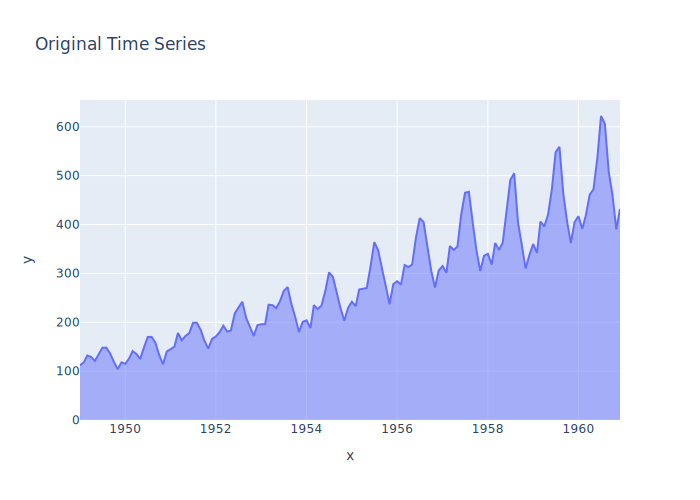

In [4]:
import plotly.express as px

px.area(x=df_passenger.index, y=df_passenger['Passengers'], title='Original Time Series')

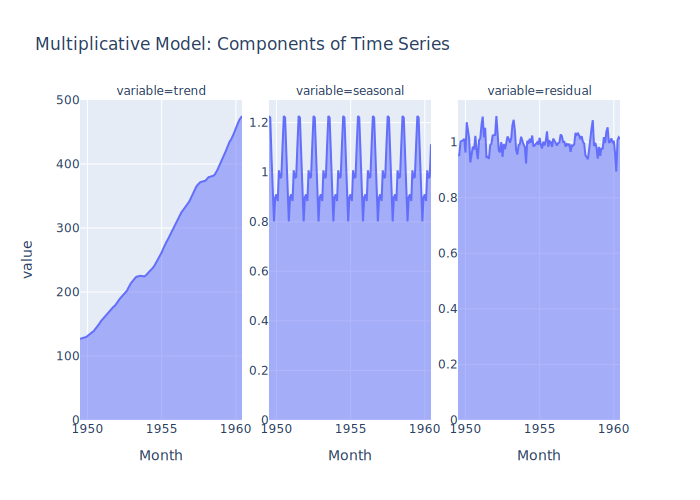

In [5]:
dff = df_component.melt(ignore_index=False)
dff = dff.query('~variable.isin(["Passengers", "component_all"])')

fig = px.area(dff, x=dff.index, y='value', facet_col='variable', title='Multiplicative Model: Components of Time Series', facet_col_spacing=0.05)
fig = fig.update_yaxes(matches=None)

for axis in fig.layout:
    if 'yaxis' in axis:
        fig.layout[axis].showticklabels = True

fig